In [2]:
!pip install mlxtend #this lib has these wrapper methods built in

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [25]:
df=pd.read_csv('winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4539,white,8.3,0.14,0.36,8.8,0.026,13.0,60.0,0.99560,3.13,0.35,11.05,5
1759,white,6.6,0.62,0.20,8.7,0.046,81.0,224.0,0.99605,3.17,0.44,9.30,5
2569,white,6.6,0.24,0.24,8.6,0.034,25.0,135.0,0.99582,3.33,0.59,10.30,6
3656,white,7.1,0.28,0.28,8.5,0.030,25.0,191.0,0.99338,3.16,0.46,12.20,7
3327,white,5.8,0.17,0.36,1.3,0.036,11.0,70.0,0.99202,3.43,0.68,10.40,7


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [28]:
df=df.dropna()

In [29]:
X=df.drop(columns='type',axis=1)
y=df['type']

In [30]:
X.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2871,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
5403,10.2,0.49,0.63,2.9,0.072,10.0,26.0,0.99680,3.16,0.78,12.5,7


In [31]:
y.sample(2)

5053      red
1396    white
Name: type, dtype: object

In [32]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
X.shape

(6463, 12)

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
#step forward feature selection(SFS)

In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [37]:
sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=42, n_jobs=-1),
        k_features=6, #we want 6 features that give best result out of 12
        forward=True,#we are doing forward selection
        floating=False, #we have two ways of doing floating and simple
        verbose=2,
        scoring='accuracy', #metric we want to be accuracy
        cv=4, #4 cross validation
        n_jobs=-1)

In [38]:
sfs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.2s finished

[2023-08-02 06:44:39] Features: 1/6 -- score: 0.9222417566367126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   16.2s finished

[2023-08-02 06:44:55] Features: 2/6 -- score: 0.9762091184012986[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.5s finished

[2023-08-02 06:45:08] Features: 3/6 -- score: 0.9866538445882689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   16.0s finished

[2023-08-02 06:45:24] Features: 4/6 -- score: 0.9907161148743293[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   13.2s finished

[202

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(n_jobs=-1,
                                                           random_state=42),
                          k_features=(6, 6), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [40]:
#seeing which features selected
sfs.k_feature_names_

('residual sugar',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'pH',
 'alcohol')

In [41]:
sfs.k_feature_idx_

(3, 4, 6, 7, 8, 10)

In [42]:
sfs.k_score_

0.9943906400024902

In [43]:
#for getting working of sfs into dataframe
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.9327146171693735, 0.9218870843000774, 0.919...",0.922242,"(total sulfur dioxide,)",0.010505,0.006553,0.003784
2,"(4, 6)","[0.9737045630317092, 0.9775715390564579, 0.973...",0.976209,"(chlorides, total sulfur dioxide)",0.004237,0.002643,0.001526
3,"(4, 6, 7)","[0.9891724671307038, 0.9837587006960556, 0.985...",0.986654,"(chlorides, total sulfur dioxide, density)",0.003547,0.002213,0.001278
4,"(3, 4, 6, 7)","[0.9922660479505027, 0.9868522815158546, 0.993...",0.990716,"(residual sugar, chlorides, total sulfur dioxi...",0.004203,0.002622,0.001514
5,"(3, 4, 6, 7, 8)","[0.9976798143851509, 0.9899458623356535, 0.993...",0.993036,"(residual sugar, chlorides, total sulfur dioxi...",0.00464,0.002895,0.001671
6,"(3, 4, 6, 7, 8, 10)","[0.9976798143851509, 0.991492652745553, 0.9945...",0.994391,"(residual sugar, chlorides, total sulfur dioxi...",0.003548,0.002213,0.001278


In [44]:
#for selecting from to features like from 3 to 9 select out of these

sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=42, n_jobs=-1),
        k_features=(3,9), #we want 6 features that give best result out of 12
        forward=True,#we are doing forward selection
        floating=False, #we have two ways of doing floating and simple
        verbose=2,
        scoring='accuracy', #metric we want to be accuracy
        cv=4, #4 cross validation
        n_jobs=-1)

In [45]:
sfs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   16.0s finished

[2023-08-02 06:58:03] Features: 1/9 -- score: 0.9222417566367126[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.5s finished

[2023-08-02 06:58:19] Features: 2/9 -- score: 0.9762091184012986[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.1s finished

[2023-08-02 06:58:32] Features: 3/9 -- score: 0.9866538445882689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   15.3s finished

[2023-08-02 06:58:47] Features: 4/9 -- score: 0.9907161148743293[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   14.8s finished

[202

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(n_jobs=-1,
                                                           random_state=42),
                          k_features=(3, 9), n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [46]:
sfs.k_feature_names_

('residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'alcohol')

In [47]:
sfs.k_score_

0.9951641848582149

In [48]:
#step backward selection SBS

In [49]:
sfs=SFS(RandomForestClassifier(n_estimators=100,random_state=42, n_jobs=-1),
        k_features=6, #we want 6 features that give best result out of 12
        forward=False,#we are doing forward selection
        floating=False, #we have two ways of doing floating and simple
        verbose=2,
        scoring='accuracy', #metric we want to be accuracy
        cv=4, #4 cross validation
        n_jobs=-1)

In [51]:
sfs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   23.9s finished

[2023-08-02 07:01:50] Features: 11/6 -- score: 0.9947779362080648[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.0s finished

[2023-08-02 07:02:12] Features: 10/6 -- score: 0.99439123860559[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.8s finished

[2023-08-02 07:02:31] Features: 9/6 -- score: 0.9938107432495529[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   16.1s finished

[2023-08-02 07:02:47] Features: 8/6 -- score: 0.9949712850093022[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   13.2s finished

[202

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(n_jobs=-1,
                                                           random_state=42),
                          forward=False, k_features=(6, 6), n_jobs=-1,
                          scoring='accuracy', verbose=2)

In [52]:
sbs=sfs

In [53]:
sbs.k_score_

0.9943906400024902

In [55]:
sbs.k_feature_names_

('residual sugar',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'pH',
 'alcohol')

In [56]:
#Exhausitive feature selection(EFS)

In [57]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [59]:
efs=EFS(RandomForestClassifier(n_estimators=100,random_state=42, n_jobs=-1),
        min_features=4, #from min features we start
        max_features=5, #till 5 features it checks for all combinations
        scoring='accuracy',
        cv=None, #because it will take a lot of time
        n_jobs=-1)

In [60]:
efs.fit(X_train,y_train)

Features: 1287/1287

ExhaustiveFeatureSelector(cv=None,
                          estimator=RandomForestClassifier(n_jobs=-1,
                                                           random_state=42),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11]],
                          max_features=5, min_features=4, n_jobs=-1)

In [61]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None, feature_groups=None)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  
 |  max_features : int (default: 1)
 |      Maximum number of features to select. If parameter `feature_groups` is not
 |      None, the number of features is equal to the number of feature groups, i.e.
 |      `len(feature_groups)`. For  example, if `feature_groups = [[0], [1], [2, 3],
 |      [4]]`, the

In [62]:
efs.best_score_

0.9996131528046421

In [63]:
efs.best_feature_names_

('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar')

In [64]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

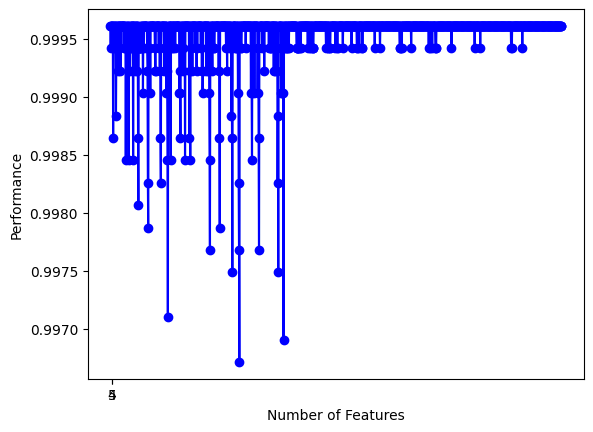

In [65]:
plot_sfs(efs.get_metric_dict(),kind='std_dev')